In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import os
import pandas as pd
from pathlib import Path
import re
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Verificação de documentos
folder_to_list = '/content/drive/My Drive/fogo_na_fake_limpeza_planilhas/planilhas_limpas'

print(f"Listando o conteúdo de: {folder_to_list}")
if os.path.exists(folder_to_list):
    files_and_folders = os.listdir(folder_to_list)
    if files_and_folders:
        for item in files_and_folders:
            print(f"- {item}")
    else:
        print("A pasta está vazia.")
else:
    print("A pasta não existe ou o caminho está incorreto.")

Listando o conteúdo de: /content/drive/My Drive/fogo_na_fake_limpeza_planilhas/planilhas_limpas
- conteudo_lote_1114_filtrado_limpo.xlsx
- conteudo_lote_0710_filtrado_limpo.xlsx
- conteudo_lote_0406_filtrado_limpo.xlsx
- conteudo_lote_25_filtrado_limpo.xlsx
- conteudo_lote_24_filtrado_limpo.xlsx
- conteudo_lote_23_filtrado_limpo.xlsx
- conteudo_lote_22_filtrado_limpo.xlsx
- conteudo_lote_21_filtrado_limpo.xlsx
- conteudo_lote_20_filtrado_limpo.xlsx
- conteudo_lote_19_filtrado_limpo.xlsx
- conteudo_lote_18_filtrado_limpo.xlsx
- conteudo_lote_17_filtrado_limpo.xlsx
- conteudo_lote_16_filtrado_limpo.xlsx
- conteudo_lote_15_filtrado_limpo.xlsx
- planilha_combinada.xlsx


In [ ]:
pasta_base = '/content/drive/My Drive/fogo_na_fake_limpeza_planilhas'

def count_lines_in_csv_folder(folder_path):
    #Exibe o número de linhas em cada arquivo XLSX dentro de uma pasta.
    print(f"\n{'=' * 80}")
    print(f"CONTANDO LINHAS NA PASTA: {folder_path}")
    print(f"{'=' * 80}")

    path = Path(folder_path)
    if not path.exists():
        print(f"A pasta '{folder_path}' não foi encontrada. Por favor, crie-a ou verifique o caminho.")
        return
    if not path.is_dir():
        print(f"O caminho '{folder_path}' não é uma pasta válida.")
        return

    # Alterando csv para xlsx
    xlsx_files = list(path.glob('*.xlsx'))

    if not xlsx_files:
        print(f"Nenhum arquivo XLSX encontrado na pasta '{folder_path}'.")
        return

    for file in xlsx_files:
        try:
            # Adicionando engine='openpyxl' para tentar resolver o erro de formato
            df = pd.read_excel(file, engine='openpyxl')
            print(f"  - '{file.name}': {len(df):,} linhas")
        except Exception as e:
            print(f"  - Erro ao ler '{file.name}': {e}")

# Caminhos completos para as pastas
planilhas_limpas_path = f'{pasta_base}/planilhas_limpas'
planilhas_marcadas_path = f'{pasta_base}/planilhas_marcadas'
# Processo da pastas 'planilhas_limpas'
count_lines_in_csv_folder(planilhas_limpas_path)
# Processo das pastas 'planilhas_marcadas'
count_lines_in_csv_folder(planilhas_marcadas_path)


CONTANDO LINHAS NA PASTA: /content/drive/My Drive/fogo_na_fake_limpeza_planilhas/planilhas_limpas
  - 'conteudo_lote_1114_filtrado_limpo.xlsx': 487 linhas
  - 'conteudo_lote_0710_filtrado_limpo.xlsx': 266 linhas
  - 'conteudo_lote_0406_filtrado_limpo.xlsx': 94 linhas
  - 'conteudo_lote_25_filtrado_limpo.xlsx': 539 linhas
  - 'conteudo_lote_24_filtrado_limpo.xlsx': 818 linhas
  - 'conteudo_lote_23_filtrado_limpo.xlsx': 511 linhas
  - 'conteudo_lote_22_filtrado_limpo.xlsx': 472 linhas
  - 'conteudo_lote_21_filtrado_limpo.xlsx': 321 linhas
  - 'conteudo_lote_20_filtrado_limpo.xlsx': 414 linhas
  - 'conteudo_lote_19_filtrado_limpo.xlsx': 290 linhas
  - 'conteudo_lote_18_filtrado_limpo.xlsx': 258 linhas
  - 'conteudo_lote_17_filtrado_limpo.xlsx': 261 linhas
  - 'conteudo_lote_16_filtrado_limpo.xlsx': 181 linhas
  - 'conteudo_lote_15_filtrado_limpo.xlsx': 185 linhas
  - Erro ao ler 'planilha_combinada.xlsx': File is not a zip file

CONTANDO LINHAS NA PASTA: /content/drive/My Drive/fogo_na_f

In [ ]:
pasta_base = '/content/drive/My Drive/fogo_na_fake_limpeza_planilhas'
planilhas_limpas_path = f'{pasta_base}/planilhas_limpas'
planilhas_marcadas_path = f'{pasta_base}/planilhas_marcadas'

def get_line_counts_from_excel_folder(folder_path, data_type_col_name):
    """Extrai o número do documento e a contagem de linhas de arquivos XLSX em uma pasta."""
    print(f"Processando pasta: {folder_path}")
    path = Path(folder_path)
    file_data = []

    if not path.exists() or not path.is_dir():
        print(f"A pasta '{folder_path}' não existe ou não é válida.")
        return []

    xlsx_files = list(path.glob('*.xlsx'))

    for file in xlsx_files:
        # Regex para extração do número do lote (ex: '1114' de 'conteudo_lote_1114_filtrado_limpo.xlsx')
        match = re.search(r'conteudo_lote_(\d+)_filtrado', file.name)
        if match:
            document_id = match.group(1)
            try:
                df = pd.read_excel(file, engine='openpyxl')
                file_data.append({'document_id': document_id, data_type_col_name: len(df)})
            except Exception as e:
                print(f"  - Erro ao ler '{file.name}': {e} (Este arquivo será ignorado)")
        else:
            print(f"  - Ignorando arquivo '{file.name}': Não corresponde ao padrão esperado para extrair o número do documento.")
    return file_data

# Puxa dados das pastas
limpas_counts = get_line_counts_from_excel_folder(planilhas_limpas_path, 'limpas')
marcadas_counts = get_line_counts_from_excel_folder(planilhas_marcadas_path, 'marcadas')
# Geração de DataFrames
df_limpas = pd.DataFrame(limpas_counts)
df_marcadas = pd.DataFrame(marcadas_counts)
# União dos DataFrames
df_combined = pd.merge(df_marcadas, df_limpas, on='document_id', how='outer').fillna(0)
# Renomeação de colunas
df_combined.rename(columns={'document_id': 'ano'}, inplace=True)
# Adição de coluna 'diferença'
df_combined['diferença'] = df_combined['marcadas'] - df_combined['limpas']
# Adição de coluna 'total_linhas'
df_combined['total_linhas'] = df_combined['marcadas'] + df_combined['limpas']
# Função para converter 'ano' para o formato desejado (20xx)
def format_ano(ano_value):
    ano_str = str(int(ano_value)) # Garante que é string para manipulação
    if len(ano_str) == 2:
        return '20' + ano_str
    elif ano_str == '406':
        return '2004 a 2006'
    elif ano_str == '710':
        return '2007 a 2010'
    elif ano_str == '1114':
        return '2011 a 2014'
    return ano_str # Retorna o original se não houver correspondência

# Aplição de formatação à coluna 'ano'
df_combined['ano'] = df_combined['ano'].apply(format_ano)

# --- Nova lógica para consolidar anos ---

# Consolidação para 2015-2017
rows_to_consolidate_2015_2017 = df_combined[df_combined['ano'].isin(['2015', '2016', '2017'])]

if not rows_to_consolidate_2015_2017.empty:
    summed_marcadas = rows_to_consolidate_2015_2017['marcadas'].sum()
    summed_limpas = rows_to_consolidate_2015_2017['limpas'].sum()
    summed_diferenca = rows_to_consolidate_2015_2017['diferença'].sum()
    summed_total_linhas = rows_to_consolidate_2015_2017['total_linhas'].sum() # Inclui a nova coluna

    new_row_2015_2017 = pd.DataFrame({
        'ano': ['2015 a 2017'],
        'marcadas': [summed_marcadas],
        'limpas': [summed_limpas],
        'diferença': [summed_diferenca],
        'total_linhas': [summed_total_linhas] # Inclui a nova coluna
    })

    df_combined = df_combined[~df_combined['ano'].isin(['2015', '2016', '2017'])]
    df_combined = pd.concat([df_combined, new_row_2015_2017], ignore_index=True)

# Nova consolidação para 2018-2020
rows_to_consolidate_2018_2020 = df_combined[df_combined['ano'].isin(['2018', '2019', '2020'])]

if not rows_to_consolidate_2018_2020.empty:
    summed_marcadas = rows_to_consolidate_2018_2020['marcadas'].sum()
    summed_limpas = rows_to_consolidate_2018_2020['limpas'].sum()
    summed_diferenca = rows_to_consolidate_2018_2020['diferença'].sum()
    summed_total_linhas = rows_to_consolidate_2018_2020['total_linhas'].sum() # Inclui a nova coluna

    new_row_2018_2020 = pd.DataFrame({
        'ano': ['2018 a 2020'],
        'marcadas': [summed_marcadas],
        'limpas': [summed_limpas],
        'diferença': [summed_diferenca],
        'total_linhas': [summed_total_linhas] # Inclui a nova coluna
    })

    df_combined = df_combined[~df_combined['ano'].isin(['2018', '2019', '2020'])]
    df_combined = pd.concat([df_combined, new_row_2018_2020], ignore_index=True)

# Nova consolidação para 2021-2023
rows_to_consolidate_2021_2023 = df_combined[df_combined['ano'].isin(['2021', '2022', '2023'])]

if not rows_to_consolidate_2021_2023.empty:
    summed_marcadas = rows_to_consolidate_2021_2023['marcadas'].sum()
    summed_limpas = rows_to_consolidate_2021_2023['limpas'].sum()
    summed_diferenca = rows_to_consolidate_2021_2023['diferença'].sum()
    summed_total_linhas = rows_to_consolidate_2021_2023['total_linhas'].sum() # Inclui a nova coluna

    new_row_2021_2023 = pd.DataFrame({
        'ano': ['2021 a 2023'],
        'marcadas': [summed_marcadas],
        'limpas': [summed_limpas],
        'diferença': [summed_diferenca],
        'total_linhas': [summed_total_linhas] # Inclui a nova coluna
    })

    df_combined = df_combined[~df_combined['ano'].isin(['2021', '2022', '2023'])]
    df_combined = pd.concat([df_combined, new_row_2021_2023], ignore_index=True)

# Nova consolidação para 2024-2025
rows_to_consolidate_2024_2025 = df_combined[df_combined['ano'].isin(['2024', '2025'])]

if not rows_to_consolidate_2024_2025.empty:
    summed_marcadas = rows_to_consolidate_2024_2025['marcadas'].sum()
    summed_limpas = rows_to_consolidate_2024_2025['limpas'].sum()
    summed_diferenca = rows_to_consolidate_2024_2025['diferença'].sum()
    summed_total_linhas = rows_to_consolidate_2024_2025['total_linhas'].sum() # Inclui a nova coluna

    new_row_2024_2025 = pd.DataFrame({
        'ano': ['2024 a 2025'],
        'marcadas': [summed_marcadas],
        'limpas': [summed_limpas],
        'diferença': [summed_diferenca],
        'total_linhas': [summed_total_linhas] # Inclui a nova coluna
    })

    df_combined = df_combined[~df_combined['ano'].isin(['2024', '2025'])]
    df_combined = pd.concat([df_combined, new_row_2024_2025], ignore_index=True)


# Lógica de ordenação após todas as consolidações
def get_sort_key(ano_value):
    if 'a' in str(ano_value): # Para intervalos como '2004 a 2006'
        return int(str(ano_value).split(' ')[0])
    else:
        return int(ano_value)

df_combined['sort_key'] = df_combined['ano'].apply(get_sort_key)
df_combined.sort_values(by='sort_key', inplace=True)
df_combined = df_combined.drop(columns=['sort_key']).reset_index(drop=True)

# --- Fim da nova lógica ---

# Exibir a planilha combinada
print("\nPlanilha Combinada:")
display(df_combined)

# Salvar a planilha combinada em um novo arquivo Excel
output_excel_path = f'{pasta_base}/planilha_consolidada_linhas.xlsx'
df_combined.to_excel(output_excel_path, index=False)
print(f"\n✓ Planilha consolidada salva em: {output_excel_path}")

Processando pasta: /content/drive/My Drive/fogo_na_fake_limpeza_planilhas/planilhas_limpas
  - Ignorando arquivo 'planilha_combinada.xlsx': Não corresponde ao padrão esperado para extrair o número do documento.
Processando pasta: /content/drive/My Drive/fogo_na_fake_limpeza_planilhas/planilhas_marcadas

Planilha Combinada:


,ano,marcadas,limpas,diferença,total_linhas
0,2004 a 2006,2137,94,2043,2231
1,2007 a 2010,3928,266,3662,4194
2,2011 a 2014,4593,487,4106,5080
3,2015 a 2017,3414,627,2787,4041
4,2018 a 2020,2384,962,1422,3346
5,2021 a 2023,3265,1304,1961,4569
6,2024 a 2025,2372,1357,1015,3729



✓ Planilha consolidada salva em: /content/drive/My Drive/fogo_na_fake_limpeza_planilhas/planilha_consolidada_linhas.xlsx


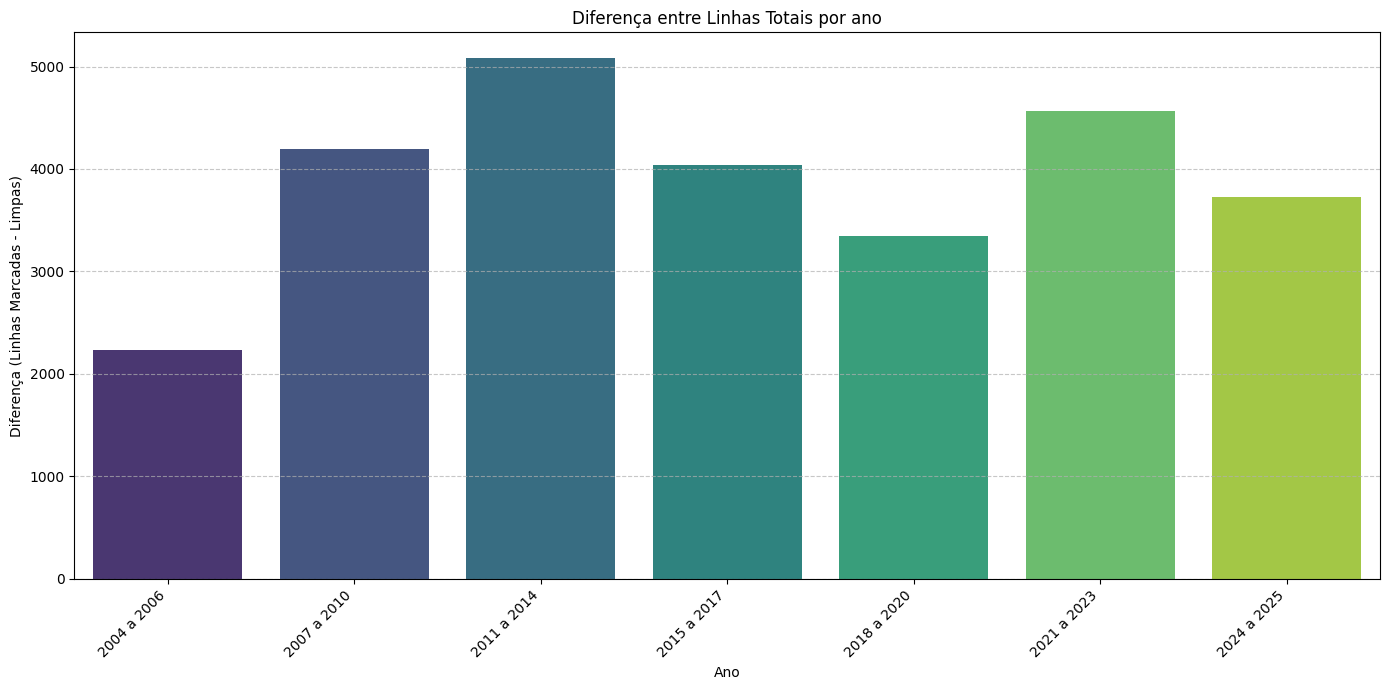

In [ ]:
output_folder = Path(pasta_base) / 'graficos_gerados'
output_folder.mkdir(parents=True, exist_ok=True)

plt.figure(figsize=(14, 7))
sns.barplot(x='ano', y='total_linhas', data=df_combined, palette='viridis', hue='ano', legend=False)

plt.title('Diferença entre Linhas Totais por ano')
plt.xlabel('Ano')
plt.ylabel('Diferença (Linhas Marcadas - Limpas)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# Salvar o gráfico
plt.savefig(output_folder / 'diferenca_total_linhas_por_ano.png')
plt.show()

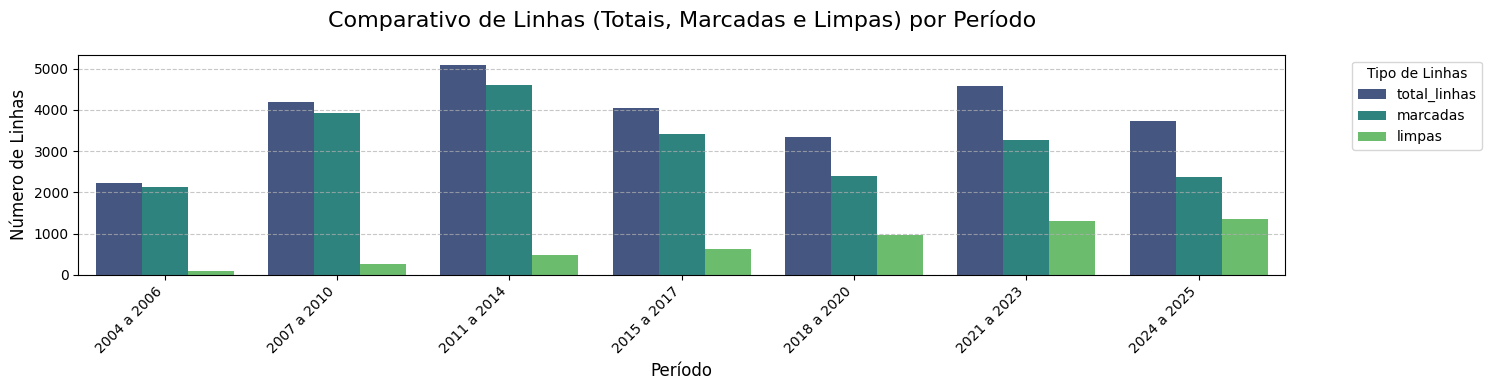

In [ ]:
output_folder = Path(pasta_base) / 'graficos_gerados'
output_folder.mkdir(parents=True, exist_ok=True)

df_melted = df_combined.melt(id_vars='ano', value_vars=['total_linhas', 'marcadas', 'limpas'],
                             var_name='Tipo de Linhas', value_name='Número de Linhas')

plt.figure(figsize=(15, 4))
sns.barplot(x='ano', y='Número de Linhas', hue='Tipo de Linhas', data=df_melted,
            palette='viridis')

plt.title('Comparativo de Linhas (Totais, Marcadas e Limpas) por Período',
          fontsize=16, pad=20)
plt.xlabel('Período', fontsize=12)
plt.ylabel('Número de Linhas', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Tipo de Linhas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
 # Salvar o gráfico
plt.savefig(output_folder / 'comparativo_linhas_por_periodo.png')
plt.show()

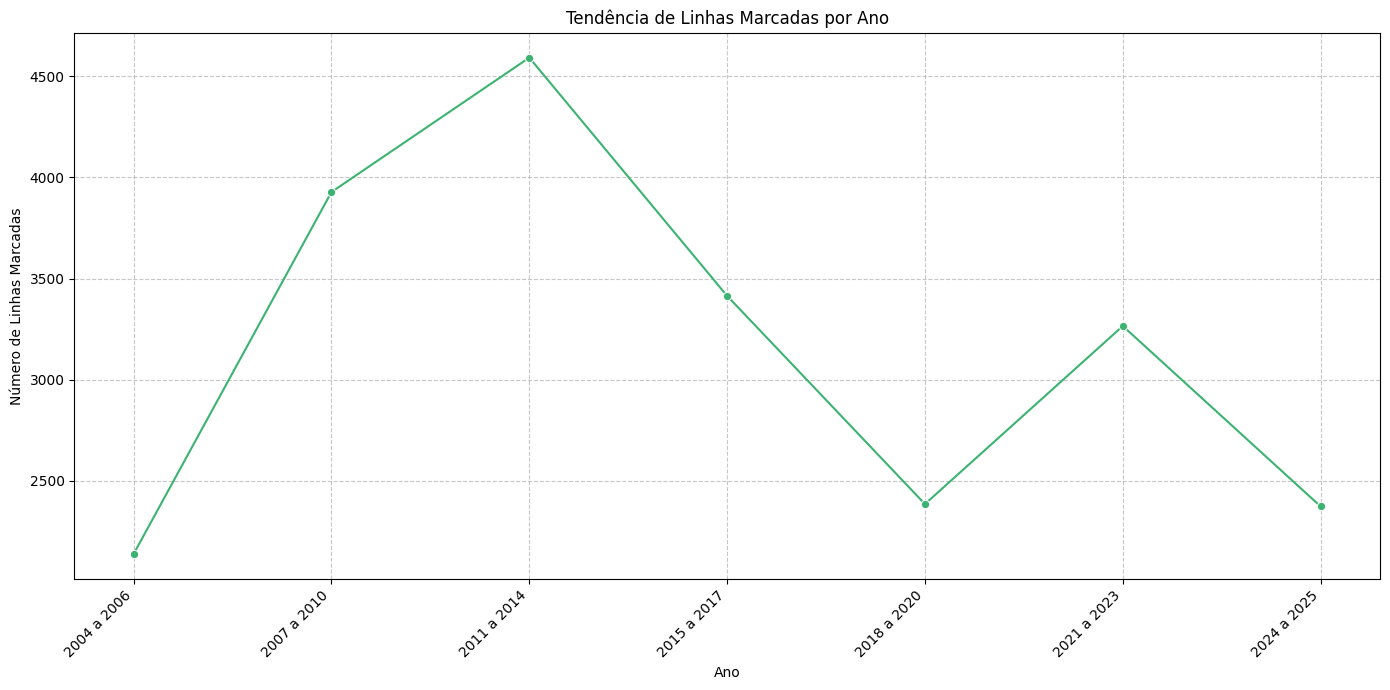

In [ ]:
output_folder = Path(pasta_base) / 'graficos_gerados'
output_folder.mkdir(parents=True, exist_ok=True)

plt.figure(figsize=(14, 7))
sns.lineplot(x='ano', y='marcadas', data=df_combined, marker='o', color='mediumseagreen')

plt.title('Tendência de Linhas Marcadas por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Linhas Marcadas')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
# Salvar o gráfico
plt.savefig(output_folder / 'tendencia_linhas_marcadas_por_ano.png')
plt.show()

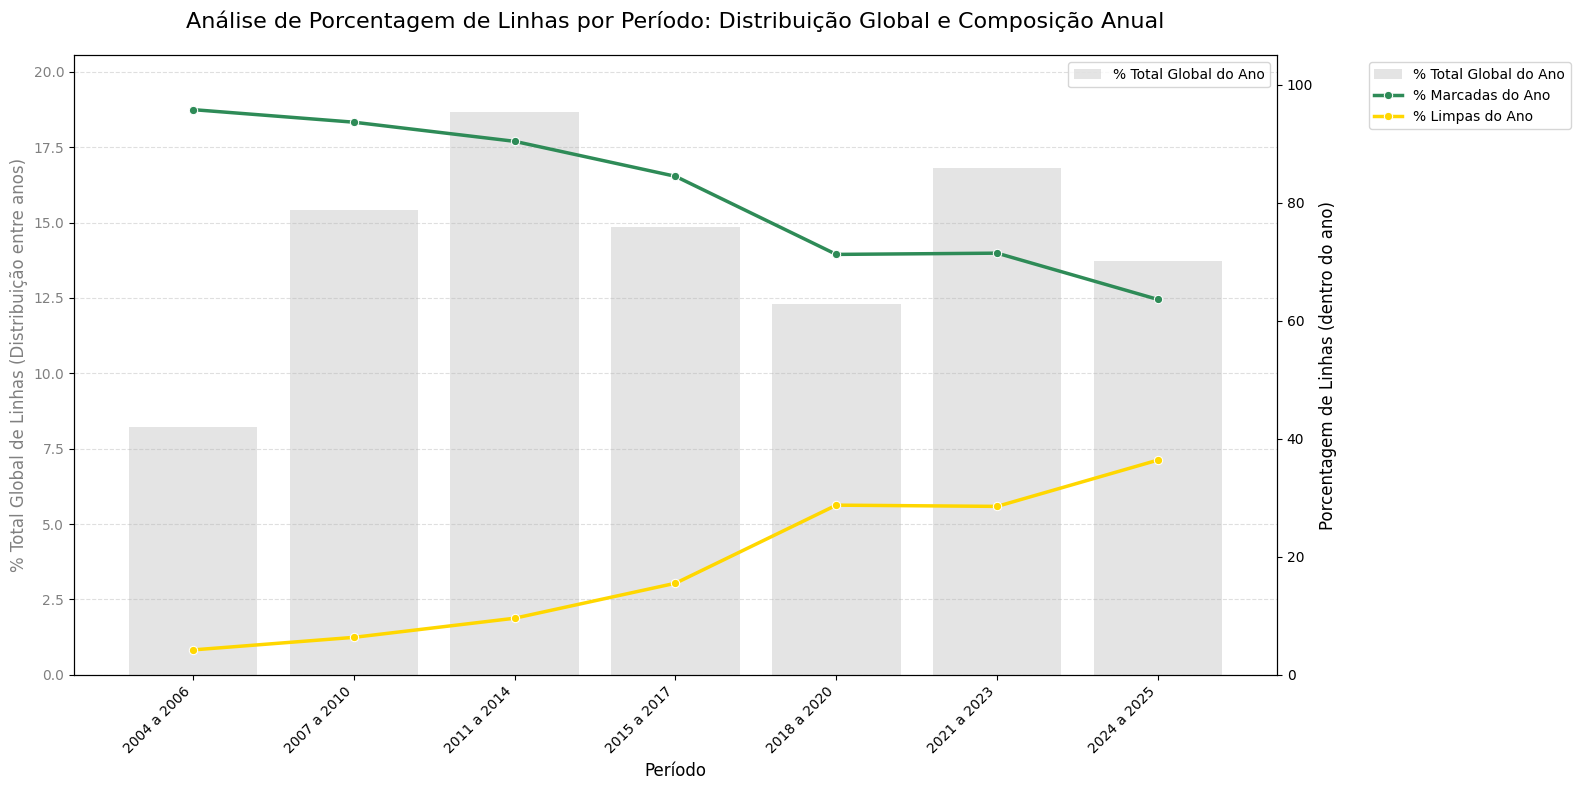

In [ ]:
output_folder = Path(pasta_base) / 'graficos_gerados'
output_folder.mkdir(parents=True, exist_ok=True)

df_plot = df_combined.copy()

# Calcula a porcentagem de linhas marcadas e limpas em relação ao total de linhas para cada ano.
df_plot['% Marcadas do Ano'] = (df_plot['marcadas'] / df_plot['total_linhas']) * 100
df_plot['% Limpas do Ano'] = (df_plot['limpas'] / df_plot['total_linhas']) * 100

# Calcula o total de linhas de cada ano como uma porcentagem do total geral de todos os anos.
grand_total_all_years = df_plot['total_linhas'].sum()
df_plot['% Total Global do Ano'] = (df_plot['total_linhas'] / grand_total_all_years) * 100

# Melt the dataframe for easier plotting of the lines
df_melted_lines = df_plot.melt(id_vars='ano', value_vars=['% Marcadas do Ano', '% Limpas do Ano'],
                               var_name='Tipo de Porcentagem', value_name='Porcentagem')


# Criação do plot
fig, ax1 = plt.subplots(figsize=(16, 8))

sns.barplot(x='ano', y='% Total Global do Ano', data=df_plot, ax=ax1,
            color='lightgray', alpha=0.6, label='% Total Global do Ano')
ax1.set_xlabel('Período', fontsize=12)
ax1.set_ylabel('% Total Global de Linhas (Distribuição entre anos)', color='gray', fontsize=12)
ax1.tick_params(axis='y', labelcolor='gray')
ax1.set_ylim(0, df_plot['% Total Global do Ano'].max() * 1.1)
ax1.grid(axis='y', linestyle='--', alpha=0.4)

ax2 = ax1.twinx()
sns.lineplot(x='ano', y='Porcentagem', hue='Tipo de Porcentagem', data=df_melted_lines,
             marker='o', ax=ax2, linewidth=2.5, palette={'% Marcadas do Ano': 'seagreen', '% Limpas do Ano': 'gold'})
ax2.set_ylabel('Porcentagem de Linhas (dentro do ano)', fontsize=12)
ax2.set_ylim(0, 105)
ax2.tick_params(axis='y')

plt.title('Análise de Porcentagem de Linhas por Período: Distribuição Global e Composição Anual', fontsize=16, pad=20)
fig.autofmt_xdate(rotation=45)

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles1 + handles2, labels1 + labels2, loc='upper right', bbox_to_anchor=(1.25, 1))

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(output_folder / 'analise_porcentagem_linhas_por_periodo.png')
plt.show()

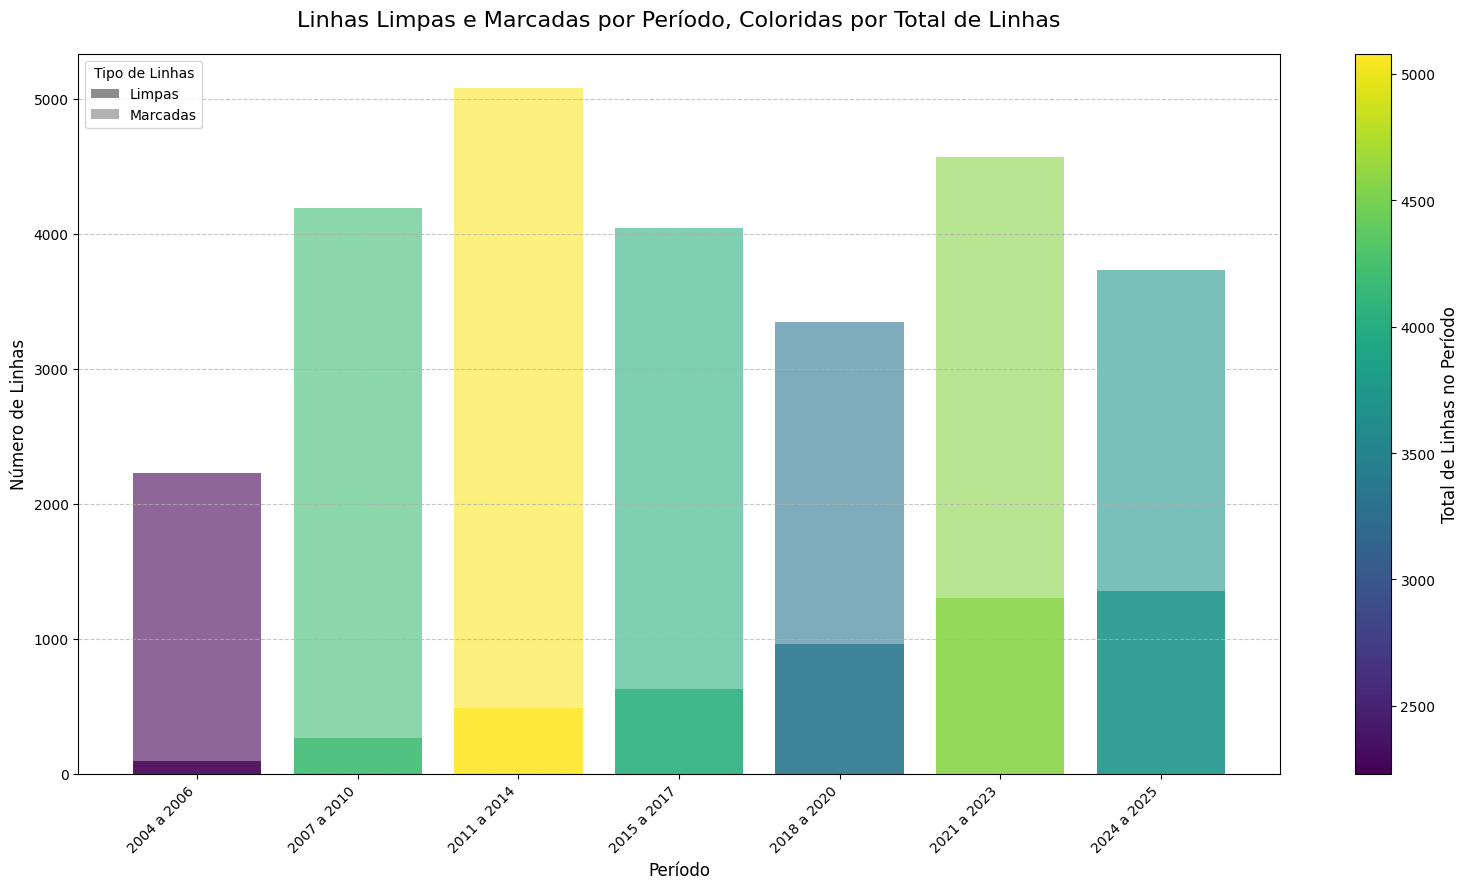

In [ ]:
output_folder = Path(pasta_base) / 'graficos_gerados'
output_folder.mkdir(parents=True, exist_ok=True)

fig, ax = plt.subplots(figsize=(16, 9))

colormap = plt.cm.viridis
norm = Normalize(vmin=df_combined['total_linhas'].min(), vmax=df_combined['total_linhas'].max())

for i, row in df_combined.iterrows():
    year = row['ano']
    total_lines_for_year = row['total_linhas']
    color_for_year = colormap(norm(total_lines_for_year))

    ax.bar(year, row['limpas'], color=color_for_year, alpha=0.9, label='Limpas' if i == 0 else '')

    ax.bar(year, row['marcadas'], bottom=row['limpas'], color=color_for_year, alpha=0.6, label='Marcadas' if i == 0 else '')


ax.set_title('Linhas Limpas e Marcadas por Período, Coloridas por Total de Linhas', fontsize=16, pad=20)

ax.set_xlabel('Período', fontsize=12)
ax.set_ylabel('Número de Linhas', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)

sm = ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', label='Total de Linhas no Período')
cbar.set_label('Total de Linhas no Período', fontsize=12)

legend_handles = [
    plt.Rectangle((0, 0), 1, 1, fc='gray', alpha=0.9, label='Limpas'),
    plt.Rectangle((0, 0), 1, 1, fc='gray', alpha=0.6, label='Marcadas')
]
ax.legend(handles=legend_handles, loc='upper left', title='Tipo de Linhas')

plt.tight_layout()

plt.savefig(output_folder / 'stacked_bar_limpas_marcadas_total_color.png')

plt.show()